### 📁 Set Working Directory
We ensure the notebook runs from the project root so relative paths resolve correctly across environments.


In [18]:
import os

cwd = os.getcwd()
if cwd.endswith("notebooks"):
    base_path = os.path.abspath(os.path.join(cwd, ".."))
else:
    base_path = cwd

print("Working directory set to:", base_path)


Working directory set to: c:\Users\Emron nabizadeh\Documents\Data-analyst\Project\walmart-sales-forecasting


### 📥 Load Raw Dataset
We load the Walmart sales dataset from `data/raw/`. This includes weekly sales, store info, and economic indicators.


In [19]:
import pandas as pd

file_name = "Walmart Data Analysis and Forecasting.csv"
file_path = os.path.join(base_path, "data", "raw", file_name)

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at: {file_path}")
else:
    print("✅ File found:", file_path)

df = pd.read_csv(file_path)
print("✅ Data loaded successfully. Shape:", df.shape)
df.head()


✅ File found: c:\Users\Emron nabizadeh\Documents\Data-analyst\Project\walmart-sales-forecasting\data\raw\Walmart Data Analysis and Forecasting.csv
✅ Data loaded successfully. Shape: (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### 🧹 Clean Column Names
We standardize column names for consistency: lowercase, no spaces, no trailing whitespace.


In [20]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Cleaned column names:", df.columns.tolist())


Cleaned column names: ['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment']


### 🔍 Column Overview & Missing Values
We inspect column names, data types, and missing values to prepare for cleaning and transformation.


In [21]:
print("Columns:", df.columns.tolist())
df.info()
df.isnull().sum()


Columns: ['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

### 📊 Summary Statistics
We review basic statistics for numerical columns to understand distributions, ranges, and potential outliers.


In [22]:
df.describe()


,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### 📈 Weekly Sales Distribution
We visualize the distribution of weekly sales to identify skewness, outliers, and central tendency.


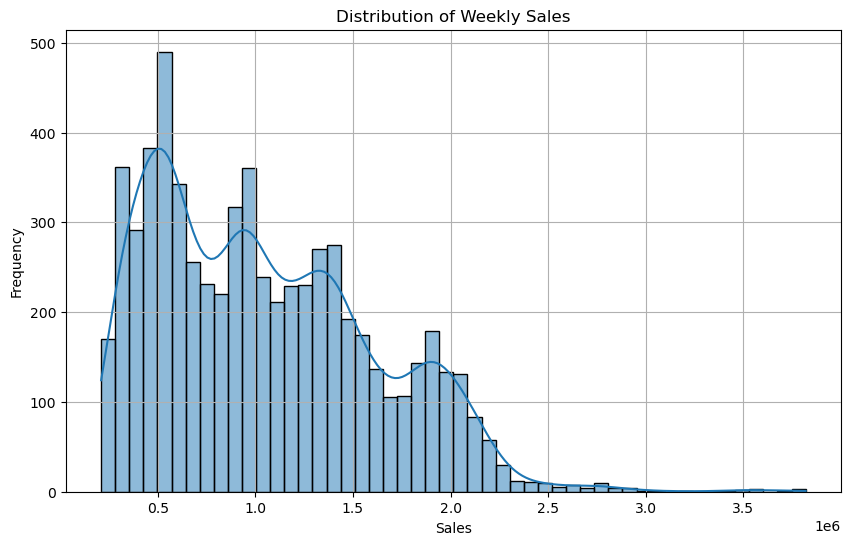

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['weekly_sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### 📅 Parse Dates
We convert the `date` column to datetime format and inspect the range to prepare for time series analysis.


In [24]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("Date range:", df['date'].min(), "to", df['date'].max())


Date range: 2010-01-10 00:00:00 to 2012-12-10 00:00:00


### 🎉 Holiday Flag Breakdown
We inspect how many weeks are marked as holidays to explore their impact on sales later.


In [25]:
print("Holiday Flag Breakdown:")
print(df['holiday_flag'].value_counts())


Holiday Flag Breakdown:
holiday_flag
0    5985
1     450
Name: count, dtype: int64


### 📆 Total Weekly Sales Over Time
We plot total weekly sales across time to identify seasonal patterns, trends, and anomalies.


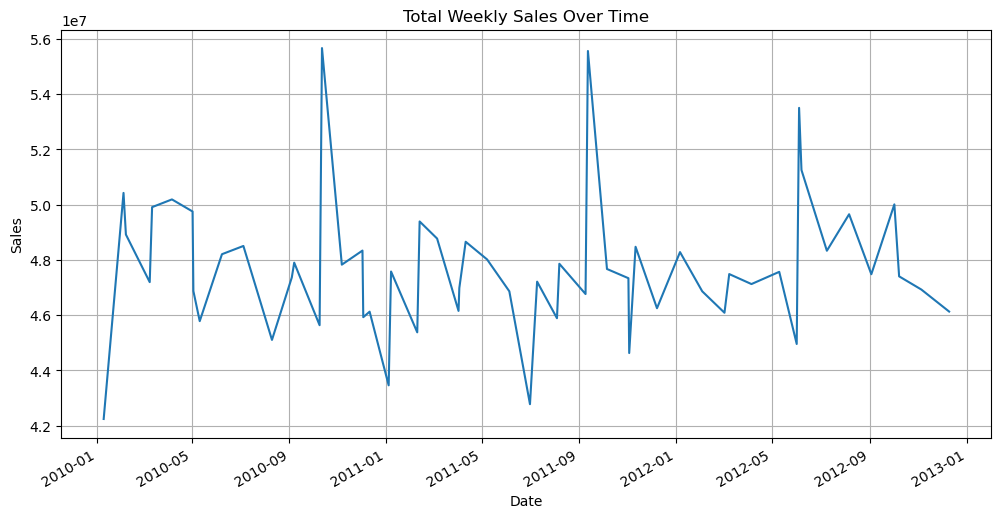

In [26]:
sales_by_date = df.groupby('date')['weekly_sales'].sum()

plt.figure(figsize=(12, 6))
sales_by_date.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


### 💾 Save Snapshot
We export a cleaned snapshot of the raw data for use in the next notebook: `01_data_cleaning.ipynb`.


In [27]:
output_path = os.path.join(base_path, "data", "processed", "walmart_snapshot.csv")
df.to_csv(output_path, index=False)
print("✅ Snapshot saved to:", output_path)


✅ Snapshot saved to: c:\Users\Emron nabizadeh\Documents\Data-analyst\Project\walmart-sales-forecasting\data\processed\walmart_snapshot.csv
